In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [58]:
df1 = pd.read_csv("./Dataset/healthcare-dataset-stroke-data.csv", index_col = 'id')
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [60]:
df1['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [61]:

cols = [col for col in df1.columns]
def data_sum_info(df1, cols):
    for col in cols:
        print(f"\n{col}")
        print("-----------------")
        print(df1[col].value_counts())
data_sum_info(df1, cols)


gender
-----------------
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

age
-----------------
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

hypertension
-----------------
hypertension
0    4612
1     498
Name: count, dtype: int64

heart_disease
-----------------
heart_disease
0    4834
1     276
Name: count, dtype: int64

ever_married
-----------------
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
-----------------
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
-----------------
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

avg_glucose_level
-----------------
avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111

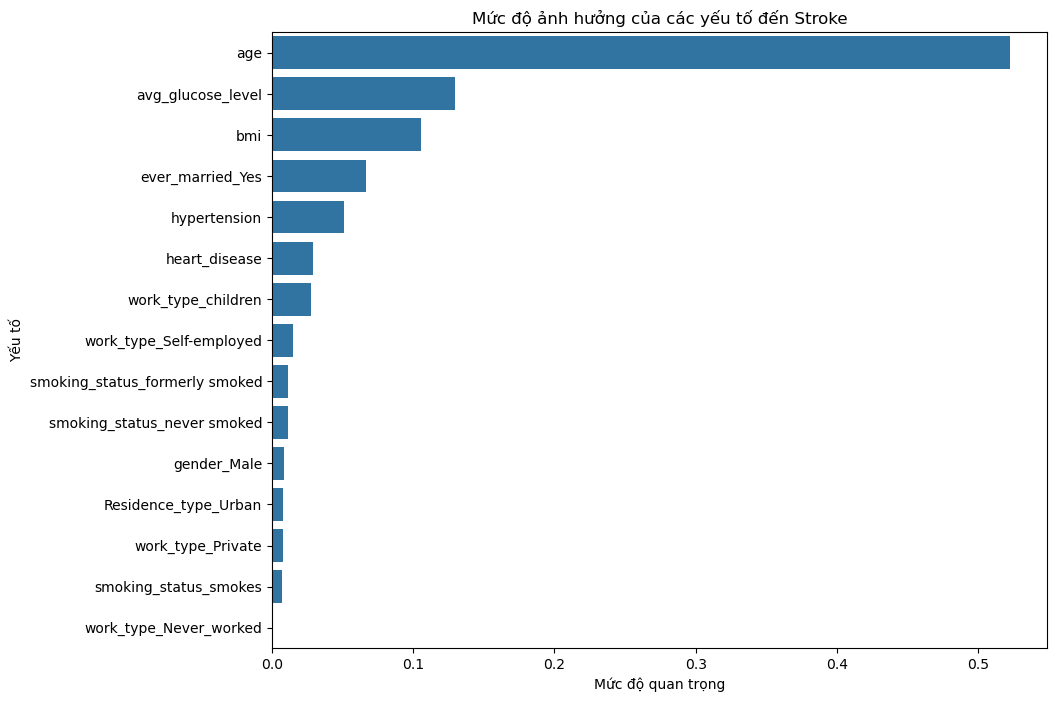

In [68]:
df1['bmi'] = df1['bmi'].fillna(df1['bmi'].median())

df_encoded = pd.get_dummies(
    df1,
    columns=[
        'gender',
        'ever_married',
        'work_type',
        'Residence_type',
        'smoking_status'
    ],
    drop_first=True
)

X = df_encoded.drop(columns='stroke')
y = df_encoded['stroke']

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X, y)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df.head(15)
)
plt.title('Mức độ ảnh hưởng của các yếu tố đến Stroke')
plt.xlabel('Mức độ quan trọng')
plt.ylabel('Yếu tố')
plt.show()


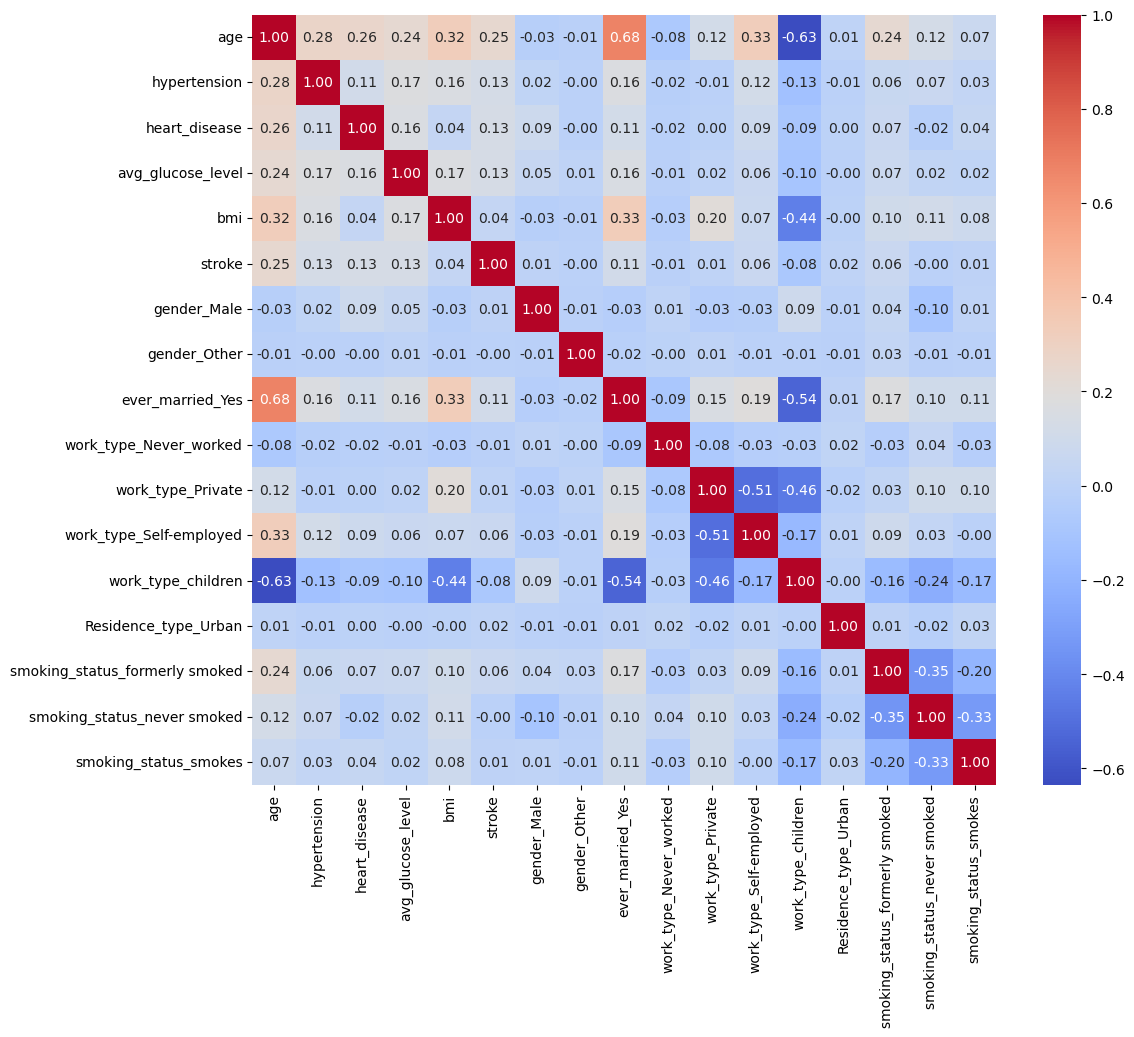

In [70]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f');

# Model

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier

df2 = pd.read_csv("./Dataset/healthcare-dataset-stroke-data.csv", index_col = 'id')
df2_encoded = pd.get_dummies(
    df2,
    columns=[
        'gender',
        'ever_married',
        'work_type',
        'Residence_type',
        'smoking_status'
    ],
    drop_first=True
)
X = df2_encoded.drop(columns = 'stroke')
y = df2_encoded['stroke']
df2_encoded.sample(frac = 1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


bmi_median = X_train['bmi'].median()
X_train['bmi'] = X_train['bmi'].fillna(bmi_median)
X_test['bmi'] = X_test['bmi'].fillna(bmi_median)


## xgboost

In [105]:
xgb = XGBClassifier(n_estimators = 100, 
                    max_depth = 4,
                    learning_rate = 0.05,
                    scale_pos_weight = 25,
                    random_state = 42 )
xgb.fit(X_train, y_train)
y_precitxgb = xgb.predict(X_test)
print (classification_report(y_test, y_precitxgb))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_precitxgb))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83       972
           1       0.13      0.80      0.22        50

    accuracy                           0.73      1022
   macro avg       0.56      0.76      0.53      1022
weighted avg       0.94      0.73      0.80      1022

Confusion Matrix
[[702 270]
 [ 10  40]]


## xgboost with threshold

In [106]:
y_probs = xgb.predict_proba(X_test)[:, 1]
threshold = 0.7
y_pred_custom = (y_probs > threshold).astype(int)

print(f"--- Classification Report (Threshold > {threshold}) ---")
print(classification_report(y_test, y_pred_custom))
print("Confusion_matrix")
print(confusion_matrix(y_test, y_pred_custom))


--- Classification Report (Threshold > 0.7) ---
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       972
           1       0.21      0.62      0.31        50

    accuracy                           0.86      1022
   macro avg       0.59      0.75      0.62      1022
weighted avg       0.94      0.86      0.89      1022

Confusion_matrix
[[852 120]
 [ 19  31]]


## random forest

In [108]:
model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_test_pred))
print("confusion matrix")
print(confusion_matrix(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.55      1022
weighted avg       0.95      0.75      0.82      1022

confusion matrix
[[728 244]
 [ 10  40]]


## eec

In [119]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import EasyEnsembleClassifier
model_master = EasyEnsembleClassifier(
    n_estimators=50,
    estimator=DecisionTreeClassifier(
        max_depth=4,
        min_samples_leaf=10
    ),
    random_state=42,
    n_jobs=-1
)
model_master.fit(X_train, y_train)
y_pre2 = model_master.predict(X_test)
print(classification_report(y_test, y_pre2))
print("confusion matrix")
print(confusion_matrix(y_test, y_pre2))


              precision    recall  f1-score   support

           0       0.99      0.66      0.79       972
           1       0.11      0.84      0.20        50

    accuracy                           0.67      1022
   macro avg       0.55      0.75      0.50      1022
weighted avg       0.95      0.67      0.77      1022

confusion matrix
[[646 326]
 [  8  42]]


# Smote dataset

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier

df3 = pd.read_csv("./Dataset/healthcare-dataset-stroke-data.csv", index_col = 'id')
df3_encoded = pd.get_dummies(
    df3,
    columns=[
        'gender',
        'ever_married',
        'work_type',
        'Residence_type',
        'smoking_status'
    ],
    drop_first=True
)
X = df3_encoded.drop(columns = 'stroke')
y = df3_encoded['stroke']
df3_encoded.sample(frac = 1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


bmi_median = X_train['bmi'].median()
X_train['bmi'] = X_train['bmi'].fillna(bmi_median)
X_test['bmi'] = X_test['bmi'].fillna(bmi_median)


In [123]:
# down sample scale 2:1
from sklearn.utils import resample

X_train_full = X_train.copy()
X_train_full['stroke'] = y_train.values

majority = X_train_full[X_train_full['stroke'] == 0]
minority = X_train_full[X_train_full['stroke'] == 1]

majority_down = resample(
    majority,
    replace=False,
    n_samples=len(minority) * 2, 
    random_state=42
)

train_down = pd.concat([majority_down, minority])
train_down = train_down.sample(frac=1, random_state=42)

X_train_down = train_down.drop(columns='stroke')
y_train_down = train_down['stroke']
y_train_down

id
224      0
68356    1
37888    0
58438    0
28669    0
        ..
20740    0
28717    0
34326    0
56546    1
53328    0
Name: stroke, Length: 597, dtype: int64

In [124]:
#smote balance
from imblearn.over_sampling import SMOTE

smote = SMOTE(
    sampling_strategy=0.8,   # minority ≈ 80% majority
    random_state=42
)

X_train_f, y_train_f = smote.fit_resample(
    X_train_down, y_train_down
)


## xgboost

In [127]:
xgb = XGBClassifier(n_estimators = 100, 
                    max_depth = 4,
                    learning_rate = 0.05,
                    scale_pos_weight = 25,
                    random_state = 42 )
xgb.fit(X_train_f, y_train_f)
y_precitxgb = xgb.predict(X_test)
print (classification_report(y_test, y_precitxgb))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_precitxgb))

              precision    recall  f1-score   support

           0       0.99      0.55      0.70       972
           1       0.09      0.88      0.16        50

    accuracy                           0.56      1022
   macro avg       0.54      0.71      0.43      1022
weighted avg       0.94      0.56      0.68      1022

Confusion Matrix
[[530 442]
 [  6  44]]


## random forest x smote

In [128]:
model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train_f, y_train_f)
y_test_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_test_pred))
print("confusion matrix")
print(confusion_matrix(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.98      0.67      0.80       972
           1       0.11      0.80      0.20        50

    accuracy                           0.68      1022
   macro avg       0.55      0.74      0.50      1022
weighted avg       0.94      0.68      0.77      1022

confusion matrix
[[656 316]
 [ 10  40]]


## xgboost x smote x threshold

In [129]:
y_probs = xgb.predict_proba(X_test)[:, 1]
threshold = 0.7
y_pred_custom = (y_probs > threshold).astype(int)

print(f"--- Classification Report (Threshold > {threshold}) ---")
print(classification_report(y_test, y_pred_custom))
print("Confusion_matrix")
print(confusion_matrix(y_test, y_pred_custom))


--- Classification Report (Threshold > 0.7) ---
              precision    recall  f1-score   support

           0       0.98      0.58      0.73       972
           1       0.09      0.82      0.16        50

    accuracy                           0.59      1022
   macro avg       0.54      0.70      0.45      1022
weighted avg       0.94      0.59      0.70      1022

Confusion_matrix
[[566 406]
 [  9  41]]


In [131]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import EasyEnsembleClassifier
model_master = EasyEnsembleClassifier(
    n_estimators=50,
    estimator=DecisionTreeClassifier(
        max_depth=4,
        min_samples_leaf=10
    ),
    random_state=42,
    n_jobs=-1
)
model_master.fit(X_train_f, y_train_f)
y_pre2 = model_master.predict(X_test)
print(classification_report(y_test, y_pre2))
print("confusion matrix")
print(confusion_matrix(y_test, y_pre2))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80       972
           1       0.11      0.82      0.20        50

    accuracy                           0.68      1022
   macro avg       0.55      0.74      0.50      1022
weighted avg       0.94      0.68      0.77      1022

confusion matrix
[[649 323]
 [  9  41]]


In [132]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

svm_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        class_weight='balanced',
        probability=True,
        random_state=42
    ))
])

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.78      0.87       972
           1       0.14      0.68      0.23        50

    accuracy                           0.77      1022
   macro avg       0.56      0.73      0.55      1022
weighted avg       0.94      0.77      0.84      1022

